In [195]:
import pandas as pd
import numpy as np
import sounddevice as sd
import soundfile as sf
import librosa
import os
import sys
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
def get_wav_duration(filename):
    return librosa.get_duration(path=filename)


In [3]:

def play_wav(filename, device_id=None, volume=1.0):
    """
    Play a WAV file on a specific device with adjustable volume.

    Parameters:
    - filename: Path to the WAV file
    - device_id: Index of the audio output device (None = default)
    - volume: Volume multiplier (1.0 = normal, 0.5 = half, 2.0 = double)
    """
    # Read the audio file
    data, samplerate = sf.read(filename)

    # Adjust the volume (Ensure values stay in range [-1, 1])
    data = np.clip(data * volume, -1.0, 1.0)

    # Play the modified audio
    sd.play(data, samplerate, device=device_id)
    sd.wait()  # Wait until playback is done

In [4]:
test_file = r"H:\DSP_project\ignoredir\data_test\Recording.wav"

In [5]:
play_wav(test_file, device_id=7, volume=0.2)


In [6]:
get_wav_duration(test_file)


4.45

# Dataset 1

In [182]:
path = r"H:\DSP_project\ignoredir\dataset\archive\music_dataset"

data = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        files = os.listdir(folder_path)  # List only files in the folder
        data.extend([(os.path.join(folder_path, file), folder) for file in files])
        
df = pd.DataFrame(data, columns=["fname", "Class"])
df.sort_values("Class", inplace= True)   
df.reset_index(inplace=True, drop=True)

df["duration"] = df["fname"].map(get_wav_duration)

# with Pool(processes=6) as pool:  # Use only real cores
#     test["duration"] = list(pool.imap_unordered(get_wav_duration, test["fname"]))

In [183]:
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))
display(df["duration"].describe())

,fname,Class,duration
26588,H:\DSP_project\ignoredir\dataset\archive\music...,Mandolin,3.0
3917,H:\DSP_project\ignoredir\dataset\archive\music...,Acoustic_Guitar,3.0
865,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
24805,H:\DSP_project\ignoredir\dataset\archive\music...,Keyboard,3.0
366,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
25640,H:\DSP_project\ignoredir\dataset\archive\music...,Keyboard,3.0
31914,H:\DSP_project\ignoredir\dataset\archive\music...,Shakers,3.0
35680,H:\DSP_project\ignoredir\dataset\archive\music...,Trumpet,3.0
30336,H:\DSP_project\ignoredir\dataset\archive\music...,Saxophone,3.0
33583,H:\DSP_project\ignoredir\dataset\archive\music...,Trombone,3.0


shape: (42311, 3)
class:  ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
class amount:  28


count    42311.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: duration, dtype: float64

In [203]:
test

Class
flute              3719
Acoustic_Guitar    3654
Drum_set           3648
Bass_Guitar        3613
Accordion          3581
Banjo              2998
Trombone           2965
Mandolin           2458
Keyboard           2041
Organ              1442
Shakers            1357
Electro_Guitar     1316
Harmonium          1314
Horn               1258
Ukulele             790
Clarinet            634
Violin              630
cowbell             621
Piano               575
Tambourine          558
vibraphone          506
Trumpet             503
Dobro               487
Saxophone           454
Hi_Hats             444
Floor_Tom           406
Cymbals             208
Harmonica           131
Name: count, dtype: int64

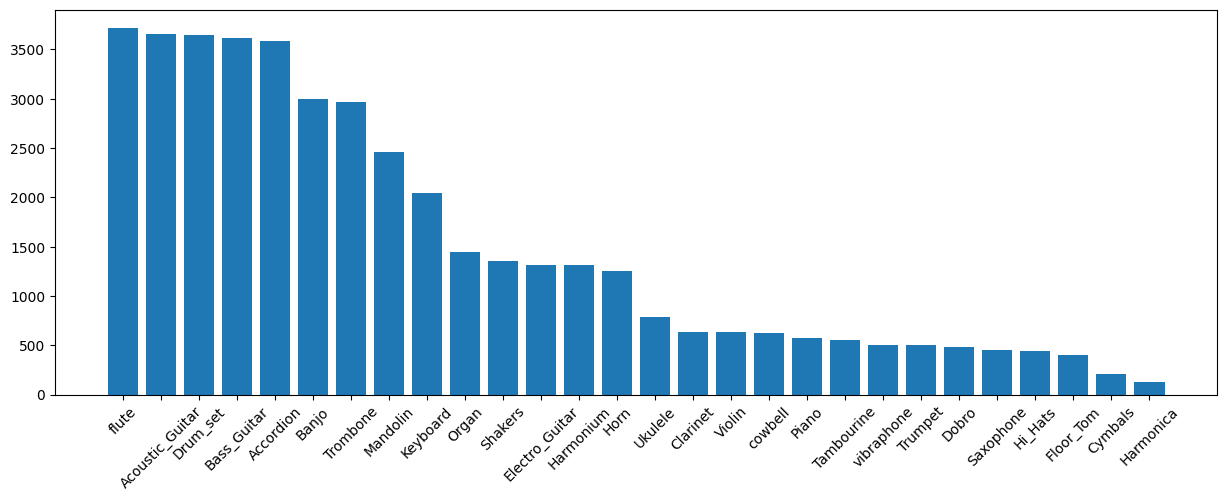

In [ ]:
test = df.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

In [11]:
play_wav(df.loc[5303, "fname"], device_id=7, volume=0.2)

# Dataset 2

## train

In [223]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Train.csv"
df = pd.read_csv(path)
# df.drop_duplicates("FileName", keep=False, inplace=True)
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))


,FileName,Class
978,TechnoDrum01_02KDtrain.wav,Sound_Drum
1186,WaveDrum02_43HH (27).wav,Sound_Drum
1064,WaveDrum02_39KD (37).wav,Sound_Drum
2419,ROOM_room5_MUS_beethoven2_DEV_amazon.wav,Sound_Piano
2084,WaveDrum02_45SD (85).wav,Sound_Violin
1912,WaveDrum02_43HH (50).wav,Sound_Violin
223,FS_NH_VII.wav,Sound_Guitar
1193,WaveDrum02_43HH (33).wav,Sound_Drum
553,LP_Lick6_KHBV.wav,Sound_Guitar
544,LP_Lick5_FBVDN.wav,Sound_Guitar


shape: (2629, 2)
class:  ['Sound_Guitar' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [211]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Train_submission\Train_submission"
print("file number: ", len(os.listdir(path)))
sub_df = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df["FileName"] = sub_df["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df["duration"] = sub_df["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df

file number:  2628


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712000
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512000
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,046578_tribal-drum-rhythms-03wav-68096.wav,16.008000
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,054399_8039s-old-school-rap-drum-loop-80433.wav,10.728000
...,...,...,...
2623,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (95).wav,14.860771
2624,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (96).wav,17.089887
2625,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (97).wav,17.846848
2626,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (98).wav,12.923084


In [277]:
test = df[df["FileName"].duplicated(keep="first")].sort_values("FileName").copy()

In [278]:
test.value_counts("Class")

Class
Sound_Violin    700
Sound_Piano       1
Name: count, dtype: int64

In [279]:
test2 = test[test["FileName"].str.contains("drum|violin|piano",regex=True, case=False)]
test2

,FileName,Class
1401,046578_tribal-drum-rhythms-03wav-68096.wav,Sound_Violin
1402,054399_8039s-old-school-rap-drum-loop-80433.wav,Sound_Violin
1403,056514_drum-40118.wav,Sound_Violin
1405,060311_rubbing-drum-sticksaif-82905.wav,Sound_Violin
1406,065339_metal-bass-drum-90850.wav,Sound_Violin
...,...,...
1596,lckk_118_drum_01_full-43553.wav,Sound_Violin
1601,marching-drums-drum-solo2-fx-99061.wav,Sound_Violin
1609,odddrumloop-91606.wav,Sound_Violin
1610,on-rd-bruce-drums-1-89708.wav,Sound_Violin


In [288]:
test2["FileName"].str.extract("(drum|violin|piano)").dropna()

,0
1401,drum
1402,drum
1403,drum
1405,drum
1406,drum
1408,drum
1410,drum
1411,drum
1420,drum
1422,drum


In [275]:
test2[["newClass"]] = test2["FileName"].str.extract("(drum|violin|piano)")

C:\Users\gotxz\AppData\Local\Temp\ipykernel_7320\1566980910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2[["newClass"]] = test2["FileName"].str.extract("(drum|violin|piano)")


In [276]:
test2.value_counts("newClass")

newClass
drum    57
Name: count, dtype: int64

In [156]:
# play_wav(r"H:\DSP_project\ignoredir\dataset\archive2\Train_submission\RealDrum01_00SDtrain.wav", device_id=7, volume=0.2)

In [213]:
df = pd.merge(left=sub_df, right=df, how="left", on="FileName")
df.sample(10)

,fname,FileName,duration,Class
701,H:\DSP_project\ignoredir\dataset\archive2\Trai...,FS_Lick3_FN.wav,6.743968,Sound_Guitar
2442,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-A4-pp-2c.wav,7.473923,NaN
8,H:\DSP_project\ignoredir\dataset\archive2\Trai...,056514_drum-40118.wav,9.720000,Sound_Drum
387,H:\DSP_project\ignoredir\dataset\archive2\Trai...,classical_3_60BPM.wav,52.000000,Sound_Guitar
787,H:\DSP_project\ignoredir\dataset\archive2\Trai...,G53-47202-1111-172.wav,2.500000,Sound_Guitar
1158,H:\DSP_project\ignoredir\dataset\archive2\Trai...,LP_Lick4_KBSH.wav,6.407914,Sound_Guitar
1706,H:\DSP_project\ignoredir\dataset\archive2\Trai...,ROOM_room6_MUS_bartok_DEV_amazon.wav,30.624989,Sound_Piano
2078,H:\DSP_project\ignoredir\dataset\archive2\Trai...,VIOLIN_SOUND (121).wav,7.777596,NaN
2987,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_43HH (66).wav,14.117732,Sound_Drum
2245,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Violin_Sound (272).wav,7.460703,NaN


In [214]:
df.dropna(inplace=True)
df.drop_duplicates("FileName", inplace=True, keep=False)


In [215]:

df

,fname,FileName,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712000,Sound_Piano
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512000,Sound_Piano
48,H:\DSP_project\ignoredir\dataset\archive2\Trai...,1-E1-Major 00.wav,2.500000,Sound_Guitar
49,H:\DSP_project\ignoredir\dataset\archive2\Trai...,1-E1-Major 01.wav,2.500000,Sound_Guitar
50,H:\DSP_project\ignoredir\dataset\archive2\Trai...,1-E1-Major 02.wav,2.500000,Sound_Guitar
...,...,...,...,...
1938,H:\DSP_project\ignoredir\dataset\archive2\Trai...,strange-piano-73881.wav,26.784000,Sound_Piano
2001,H:\DSP_project\ignoredir\dataset\archive2\Trai...,the-last-piano-112677.wav,35.761633,Sound_Piano
2002,H:\DSP_project\ignoredir\dataset\archive2\Trai...,this-is-war-version-e-95411.wav,18.494694,Sound_Piano
2003,H:\DSP_project\ignoredir\dataset\archive2\Trai...,tired-ghosts-piano-65013.wav,46.560000,Sound_Piano


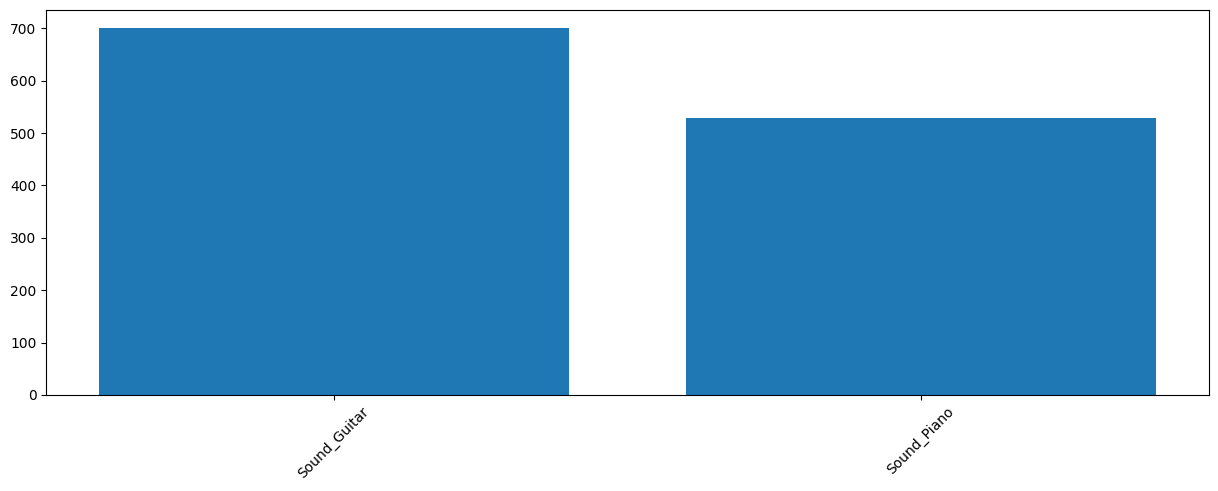

In [216]:
test = df.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

## test

In [217]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Test.csv"
df = pd.read_csv(path)
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))

,FileName,Class
10,rock_1_100BPM.wav,Sound_Guiatr
26,muvibeat4_130bpm-14334.wav,Sound_Drum
30,phaze-giant-bass-69687.wav,Sound_Drum
70,short-logo-108964.wav,Sound_Piano
6,guitar-song-57789.wav,Sound_Guiatr
22,hip-hop-drum-loop-22-33572.wav,Sound_Drum
78,wondercue-111933.wav,Sound_Piano
77,wingrandpiano-96338.wav,Sound_Piano
79,yuwu-quiz-113046.wav,Sound_Piano
33,psy-bass-beat-sample-101275.wav,Sound_Drum


shape: (80, 2)
class:  ['Sound_Guiatr' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [180]:
df[df["FileName"].duplicated(keep=False)].sort_values("FileName").head(10)

,FileName,Class


In [218]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Test_submission\Test_submission"
print("file number: ", len(os.listdir(path)))
sub_df = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df["FileName"] = sub_df["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df["duration"] = sub_df["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df

file number:  80


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Test...,100bpm-808-like-drum-loop-74838.wav,19.272000
1,H:\DSP_project\ignoredir\dataset\archive2\Test...,acoustic-guitar-logo-13084.wav,5.982041
2,H:\DSP_project\ignoredir\dataset\archive2\Test...,darbuka-drum-percussion-64018.wav,31.425306
3,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-chords-70663.wav,16.848000
4,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-intro-110935.wav,22.200000
...,...,...,...
75,H:\DSP_project\ignoredir\dataset\archive2\Test...,whatever-you-say-piano-27291.wav,21.096000
76,H:\DSP_project\ignoredir\dataset\archive2\Test...,wingrandpiano-96338.wav,3.840000
77,H:\DSP_project\ignoredir\dataset\archive2\Test...,wondercue-111933.wav,29.805714
78,H:\DSP_project\ignoredir\dataset\archive2\Test...,world-drum-beat-76217.wav,24.072000


In [219]:
df = pd.merge(left=sub_df, right=df, how="left", on="FileName")
df.sample(10)

,fname,FileName,duration,Class
51,H:\DSP_project\ignoredir\dataset\archive2\Test...,Sad-Violin-Lower-F-www.fesliyanstudios.com.wav,6.072000,Sound_Violin
67,H:\DSP_project\ignoredir\dataset\archive2\Test...,Va-ord-F3-mf-4c.wav,7.199977,Sound_Violin
45,H:\DSP_project\ignoredir\dataset\archive2\Test...,Sad-Violin-C-www.fesliyanstudios.com.wav,7.896000,Sound_Violin
13,H:\DSP_project\ignoredir\dataset\archive2\Test...,intro-music-black-box-simple-guitar-12701.wav,42.736327,Sound_Guiatr
23,H:\DSP_project\ignoredir\dataset\archive2\Test...,psy-bass-beat-sample-101275.wav,8.112000,Sound_Drum
68,H:\DSP_project\ignoredir\dataset\archive2\Test...,Va-ord-F4-ff-2c.wav,7.581723,Sound_Violin
11,H:\DSP_project\ignoredir\dataset\archive2\Test...,hip-hop-drum-loop-22-33572.wav,36.336000,Sound_Drum
21,H:\DSP_project\ignoredir\dataset\archive2\Test...,pop-drums-loops-3-11278.wav,10.684082,Sound_Drum
14,H:\DSP_project\ignoredir\dataset\archive2\Test...,kitchen-drum200616_0006_01-39711.wav,7.056000,Sound_Drum
56,H:\DSP_project\ignoredir\dataset\archive2\Test...,si-80238.wav,3.240000,Sound_Piano


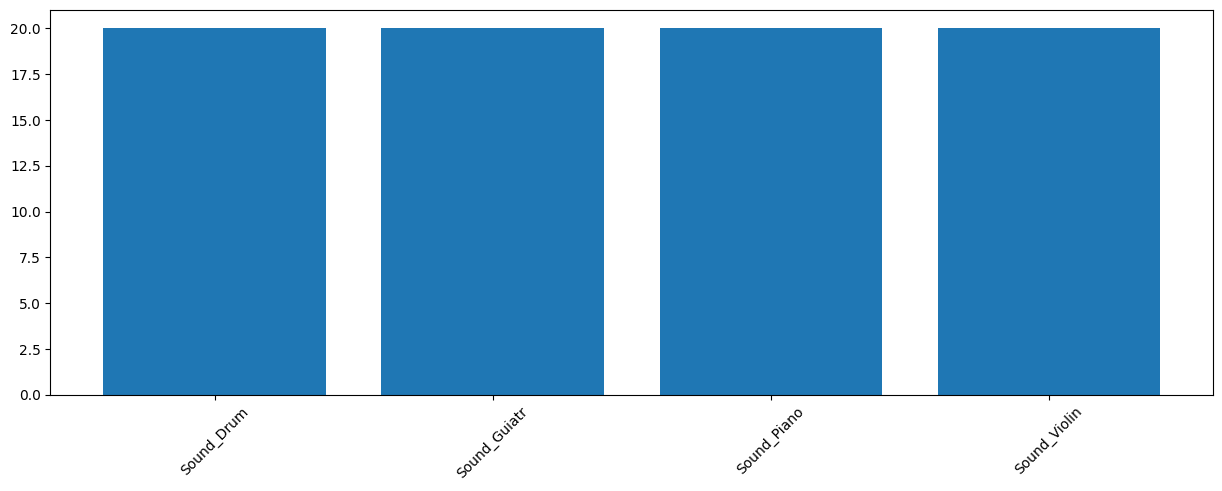

In [222]:
test = df.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()